HALP

In [19]:
import json
import numpy as np

In [3]:
with open('reddit data/all_subs.json') as subs_json:
    subreddits = json.load(subs_json)

In [ ]:
print(subreddits)

In [6]:
with open('reddit data/left.json') as left_json:
    left = json.load(left_json)
with open('reddit data/right.json') as right_json:
    right = json.load(right_json)

In [15]:
print("Left User Count: %d, Right User Count: %d" % (len(left), len(right)))

Left User Count: 22059, Right User Count: 17999


In [17]:
all_data = []

for _, subs in left.items():
    all_data.append(subs)
    

for _, subs in right.items():
    all_data.append(subs)

In [21]:
from sklearn.preprocessing import MultiLabelBinarizer

num_samples = len(left) + len(right)
num_subs = len(subreddits)

samples = np.empty((num_samples, num_subs))

mlb = MultiLabelBinarizer()

converted_data = mlb.fit_transform(all_data)




In [25]:
print(len(converted_data))

40058
18069
18069


In [49]:
len_left = len(left)
len_right = len(right)

labels = np.append(np.zeros(len_left), np.ones(len_right))
print(len(labels))

40058


In [52]:
from sklearn.naive_bayes import BernoulliNB

classifier = BernoulliNB()

classifier.fit(converted_data, labels)
classifier.score(converted_data, labels)

0.82003594787558043

In [43]:
import random

user = random.choice(list(left))
print(user)
print(left[user])

Edgar_McMuffin
['thesimpsons', 'prequelmemes', 'pics', 'teenagersnew', 'askreddit', 'news', 'funny', 'kingofthehill', 'disneyvacation', 'rickandmorty', 'the_mueller', 'imgoingtohellforthis', 'gamingsuggestions']


In [44]:
a = mlb.transform([left[user]])

In [47]:
print(len(a[0]))
print(a)

18069
[[0 0 0 ..., 0 0 0]]


In [50]:
classifier.predict_proba(a)

array([[ 0.8514864,  0.1485136]])

In [51]:
classifier.score(converted_data, labels)

0.82355584402616211

In [56]:
best_alpha = 0
best_accuracy = 0

accuracies = []

for alpha in range(0, 40):
    alpha = alpha/4
    print(alpha)
    classifier = BernoulliNB(alpha=alpha)

    classifier.fit(converted_data, labels)
    accuracy = classifier.score(converted_data, labels)
    accuracies.append(accuracy)
    if(accuracy > best_accuracy):
        best_alpha = alpha
        best_accuracy = accuracy

0.0


/Users/AjayK/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


0.25
0.5
0.75
1.0
1.25
1.5
1.75
2.0
2.25
2.5
2.75
3.0
3.25
3.5
3.75
4.0
4.25
4.5
4.75
5.0
5.25
5.5
5.75
6.0
6.25
6.5
6.75
7.0
7.25
7.5
7.75
8.0
8.25
8.5
8.75
9.0
9.25
9.5
9.75


In [57]:
print(accuracies)

[0.84499975036197517, 0.82882320635079132, 0.82635178990463831, 0.82475410654550896, 0.82355584402616211, 0.82288182135902943, 0.82260721953167903, 0.82243247291427435, 0.82218283488941035, 0.82238254530930155, 0.82265714713665183, 0.82310649558140692, 0.82318138698886612, 0.82338109740875731, 0.82380548205102599, 0.82395526486594439, 0.82445454091567227, 0.82515352738529135, 0.82547805681761444, 0.82575265864496483, 0.82615207948474711, 0.8265515003245294, 0.82735034200409407, 0.82767487143641716, 0.82817414748614504, 0.82879824254830492, 0.82927255479554651, 0.82987168605521988, 0.83064556393229816, 0.83124469519197164, 0.83164411603175392, 0.8323680663038594, 0.83304208897099208, 0.83359129262569276, 0.83409056867542064, 0.83461480852763492, 0.8354885416146588, 0.83621249188676416, 0.83693644215886964, 0.83791003045583901]


In [58]:
import matplotlib
matplotlib.use("svg")
# AUTOLAB_IGNORE_START
%matplotlib inline
# AUTOLAB_IGNORE_STOP
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [60]:
alphas = [x/4 for x in range(0, 40)]

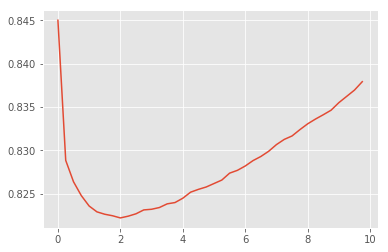

In [63]:
plt.plot(alphas, accuracies)

In [64]:
for alpha in range(10, 40):
    classifier = BernoulliNB(alpha=alpha)

    classifier.fit(converted_data, labels)
    accuracy = classifier.score(converted_data, labels)
    print(alpha, accuracy)
    accuracies.append(accuracy)
    if(accuracy > best_accuracy):
        best_alpha = alpha
        best_accuracy = accuracy

10 0.838459234111
11 0.841255179989
12 0.844625293325
13 0.847446203006
14 0.850491786909
15 0.853787008837
16 0.856857556543
17 0.860302561286
18 0.863922312647
19 0.866518548105
20 0.870063408058
21 0.873658195616
22 0.876229467272
23 0.877852114434
24 0.883119476759
25 0.889485246393
26 0.891607169604
27 0.890858255529
28 0.889510210195
29 0.888062309651
30 0.887612961206
31 0.88564082081
32 0.883643716611
33 0.881671576214
34 0.879125268361
35 0.876978381347
36 0.873882869839
37 0.871061960158
38 0.867916521044
39 0.864396624894


In [65]:
alphas = [x/4 for x in range(0, 40)] + [x for x in range(10, 40)]
print(alphas)
print(len(alphas))
print(len(accuracies))

[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
70
70


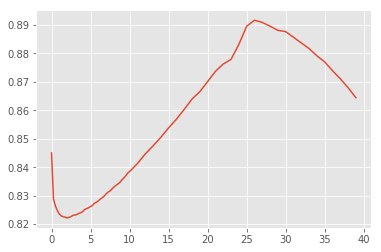

In [66]:
plt.plot(alphas, accuracies)

In [69]:
best_alpha

26

In [70]:
new_acc = []
best_acc2 = 0
best_alpha_2 = 0

for alpha in range(250, 270):
    alpha = alpha/10
    classifier = BernoulliNB(alpha=alpha)

    classifier.fit(converted_data, labels)
    accuracy = classifier.score(converted_data, labels)
    print(alpha, accuracy)
    new_acc.append(accuracy)
    if(accuracy > best_acc2):
        best_alpha_2 = alpha
        best_acc2 = accuracy

25.0 0.889485246393
25.1 0.889385391183
25.2 0.890633581307
25.3 0.890958110739
25.4 0.890983074542
25.5 0.891182784962
25.6 0.891207748764
25.7 0.891232712567
25.8 0.891357531579
25.9 0.891582205802
26.0 0.891607169604
26.1 0.891632133407
26.2 0.891657097209
26.3 0.891607169604
26.4 0.891482350592
26.5 0.891282640172
26.6 0.891307603974
26.7 0.891232712567
26.8 0.891057965949
26.9 0.891033002147
